<a href="https://colab.research.google.com/github/ValarieMello/CSCI580_VTM/blob/main/A5_Perception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [218]:
#load in the file
from google.colab import files
uploaded = files.upload()
#bring in needed libraries
import numpy as np
import matplotlib.pyplot as plt

#load in and split the data
data = np.loadtxt("data.csv", delimiter=",")
# X = all input features (all columns except the last one)
# y = labels (last column, converted to integers)
x = data[:, :-1]
y = data[:, -1].astype(int)

#show what data we loaded in
print("Data loaded:", data.shape)

Saving data.csv to data (9).csv
Data loaded: (100, 3)


Valarie Mello

Artifical Intelligence

Assignment 5: Perception

Due: November 16th 2025

# Part 1: Heurstic Approach

**Part 1: Heurstic Approach**

**Tasks:**
*  Plot data from data.csv
*  Implement perceptron using the heuristic
approach
*  Plot the initial separation line as red,
subsequent ones after each iteration in
dashed green, and the last one in black
*  Play with the learning rate
* Analyze the results in the report

**Psudocode**
1. Start a perceptron with random weights and
bias: w 1
, w 2
, ..., w n
, b
2. For each of all points (data) with their
corresponding labels (answers):

* 2.1. Classify according to the perceptron
* 2.2. For a misclassified point (x 1
,x 2
, ..., x n
) :
* 2.2.1. If classification==0:
* 2.2.1.1. b + r → b
* 2.2.1.2. For all w i : wi + rx i → wi
* 2.2.2. If classification==1:
* 2.2.2.1. b - r → b
* 2.2.2.2. For all w i : wi - rx i → wi
3. Repeat #2 enough number of times

**Earlier heuristic approach with binary classification**

In [219]:
#graph helper function
def plot_line(weight, bias, style="-", color="black", label=None):
  # Create 2 x-range values for plotting the line
  x_vals = np.array([min(x[:,0]) - 1, max(x[:,0]) + 1])
  y_vals = -(weight[0] * x_vals + bias) / weight[1]
  plt.plot(x_vals, y_vals, linestyle=style, color=color, label=label)

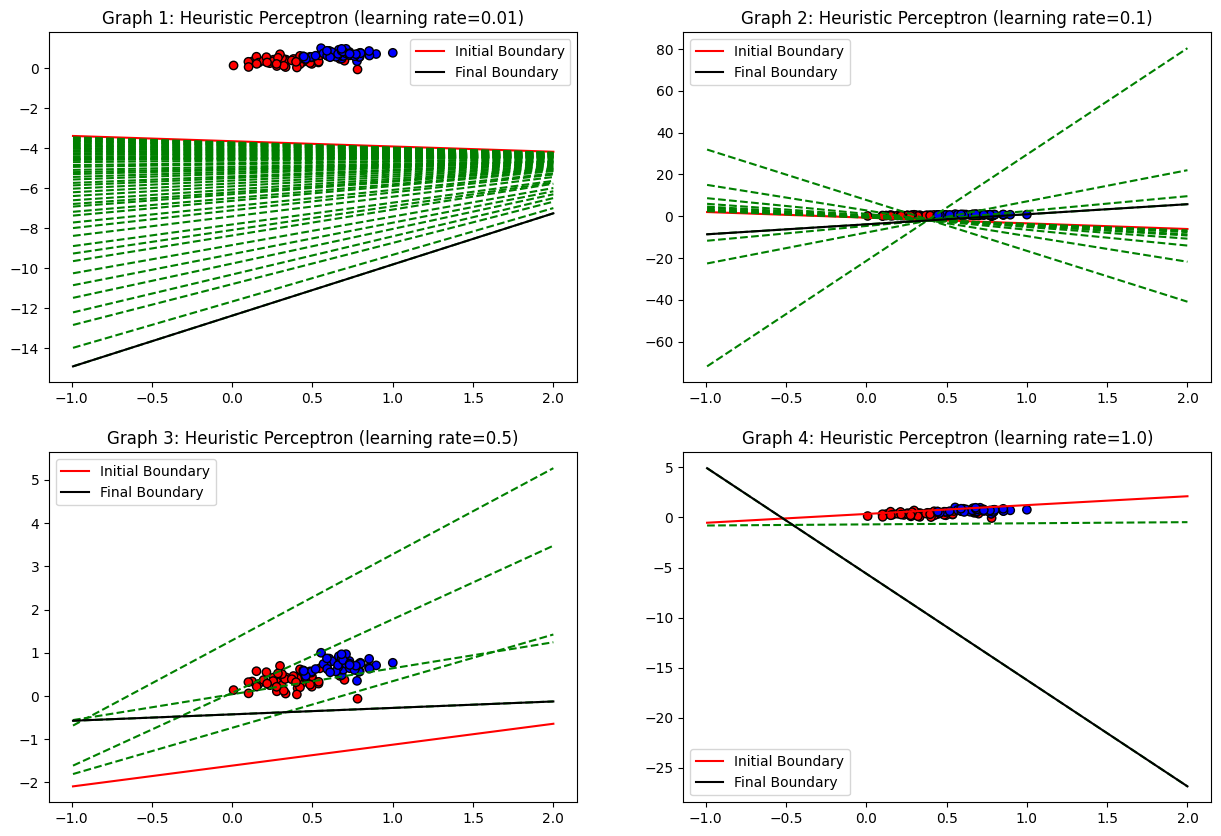

In [220]:

#function for the huristic method
def heuristic_perceptron(x, y, lr, epochs):
  #get how many columns
  n_features = x.shape[1]

  #Start a perceptron with random weights and bias
  weight = np.random.randn(n_features)
  bias = np.random.randn()

  #Plot initial boundary using red
  plot_line(weight, bias, "-", "red", label="Initial Boundary")

   #For each of all points (data) with their corresponding labels (answers):
  for j in range(epochs):
    for i in range(len(x)):
      #Classify according to perceptron
      pred = 1 if (np.dot(weight, x[i]) + bias) >= 0 else 0

      #If misclassified:
      if pred != y[i]:
        #If classificaton == 0
        if pred == 0:
        #b + r -> b
          bias = bias + lr
          #wi + r*xi -> wi  (for all weights)
          weight = weight + lr * x[i]
        #If classification == 1
        else:
          #b - r -> b
          bias = bias - lr
          #wi - r*xi -> wi
          weight = weight - lr * x[i]

        #Plot boundary after each full pass over the data in green
        plot_line(weight, bias, "--", "green")

    #graph the final boundary in black
    plot_line(weight, bias, "-", "black", label="Final Boundary")

    return weight, bias

#plot out the whole figure to be shown in report
#learning rate varibles
learning_rates = [0.01, 0.1, 0.5, 1.0]

plt.figure(figsize=(15,10))
#for loop for each of our values in learning rates
#use enumerate so we can use i and get our learning rate values
for i, lr in enumerate(learning_rates, start=1):
  #show the 4 plots
  plt.subplot(2, 2, i)
  # Plot training data
  plt.scatter(x[:,0], x[:,1], c=y, cmap="bwr", edgecolors="k")
  #call the herusitic perception
  weight_final, bias_final = heuristic_perceptron(x, y, lr=lr, epochs=65)
  plt.title(f"Graph {i}: Heuristic Perceptron (learning rate={lr})")
  plt.legend()
plt.show()

**Write Up**

I decied to go with 4 differnt learning rates and copied from your example of using 65 iterations.



To review:
the red line represents our intial boundary, the green is from each iteration(65 in our case) and the black line is the final. As the learning rate increases we see a shift from very slow and caustious learning to a very fast and eratic learning. this can be observed very well with Graph 1 which makes a fan shape that is evenly spaced but going in 2 oposite directions. by constrast our higher learning rates in graphs 2 and 3 show a more moderate learning behavior that is more evenly spaced and more closly follows the black line. Graph 4 shows the most eratic behavior. While the graph follows the black line very well for the most part there are many lines that randomly off shoot going in random directions.


Because of all of these factors it seems that the learning rates with the most sucess are **0.1 and 0.5** which are moderate in their speed and lead to the least amount of randomness and most accuratly follow the final boundary. I saw this pattern repeated even when refreshing the graph over and over again.

# Part 2: Gradient Descent Approach

**Part 2: Gradient Descent Approach**

**Tasks:**
*   Plot data from data.csv
*   Implement perceptron using the Gradient
Descent approach
*   Play with learning rate, number of epochs.
*   Plot the initial separation line as red,
subsequent ones after each iteration in
dashed green, and the last one in black
*  Compute log loss (error) and plot the error
graph every 10 epoch (see page 5)
*  Analyze the results in the report

**Psudocode**

1. Start a perceptron with random weights
and bias: w 1
, w 2
, ..., w n , b
2. For each of all points (data) with their
corresponding labels (answers):
2.1. Compute prediction output (ŷ)
2.2. Compute error function (y - ŷ)
2.3. b + r(y - ŷ) → b
2.4. For all w i : w i + r(y - ŷ)x i → w i
3. Repeat #2 until error is small


**Note: ŷ is no longer 0 or 1 from a step function.**


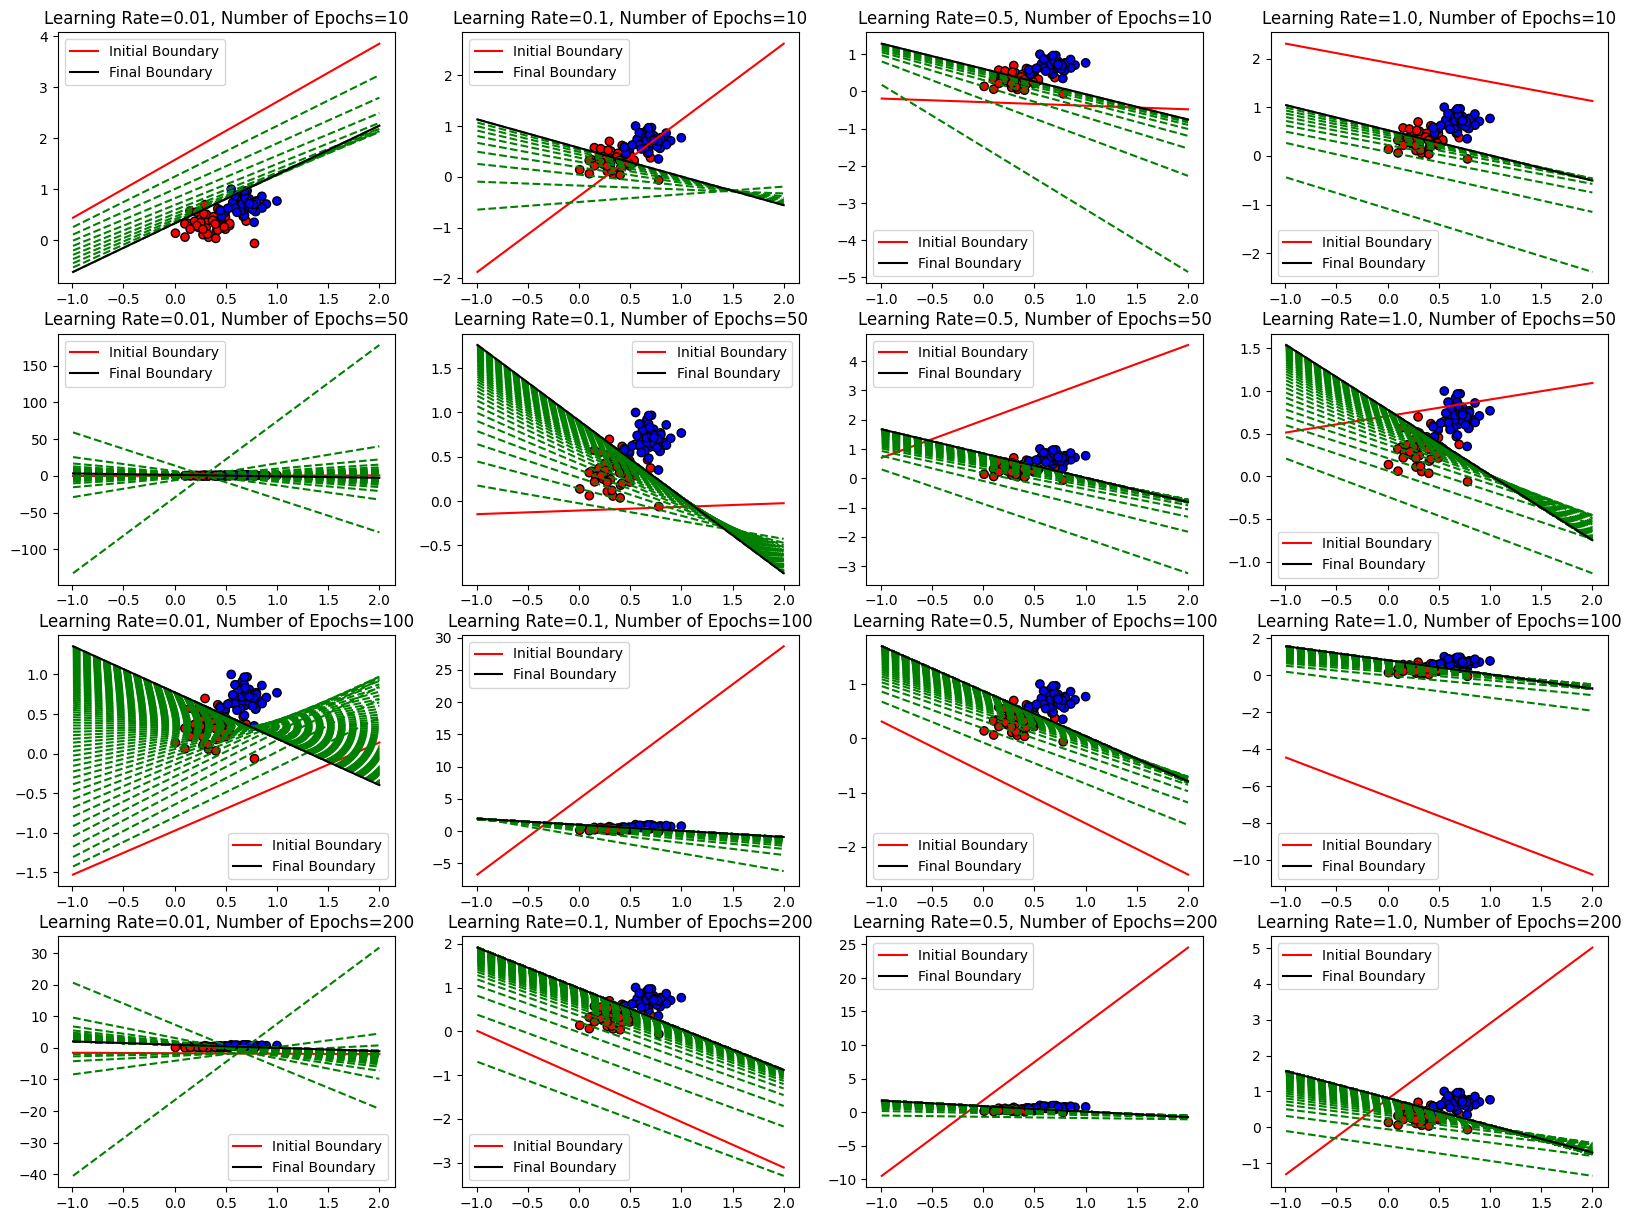

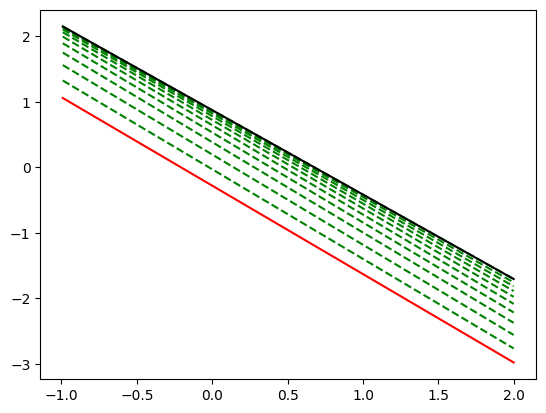

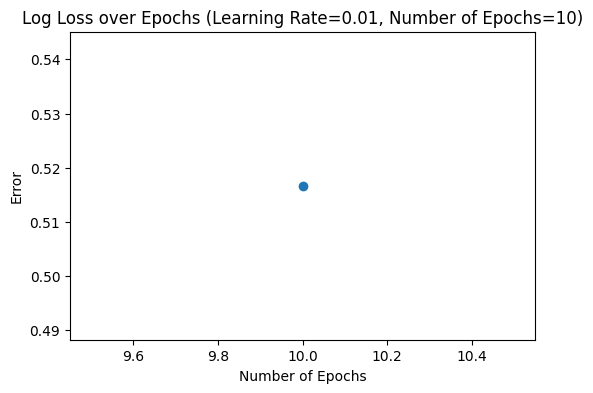

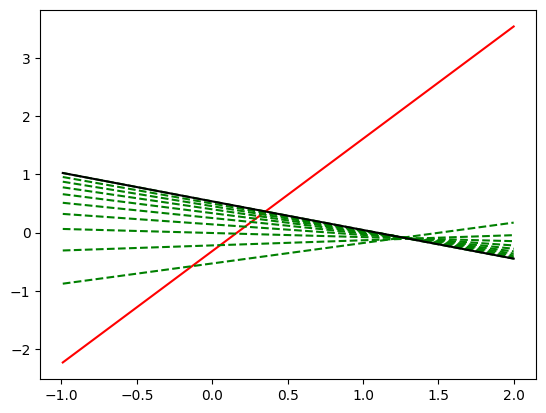

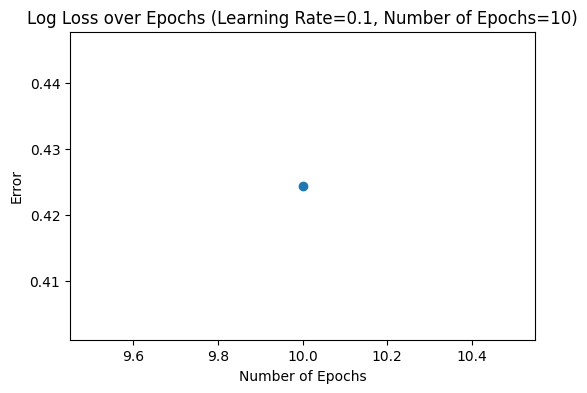

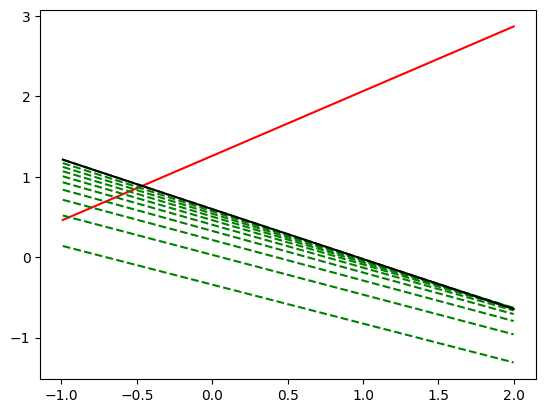

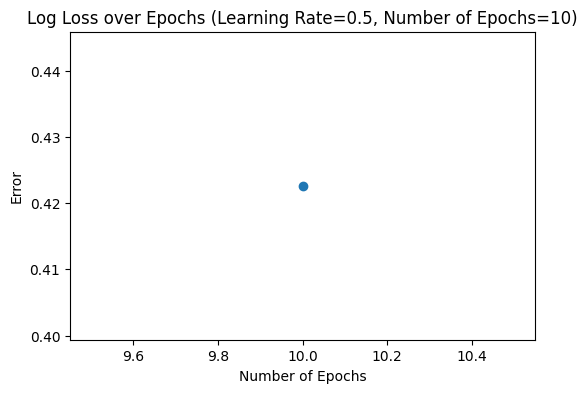

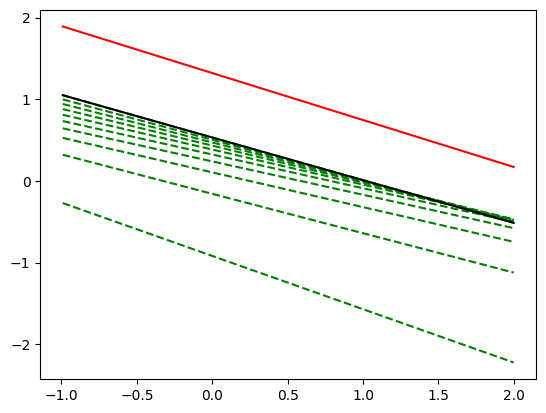

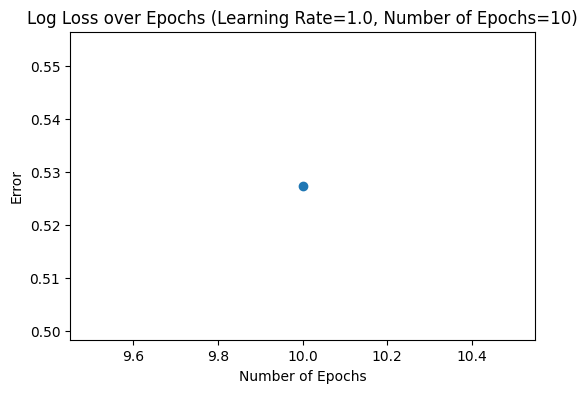

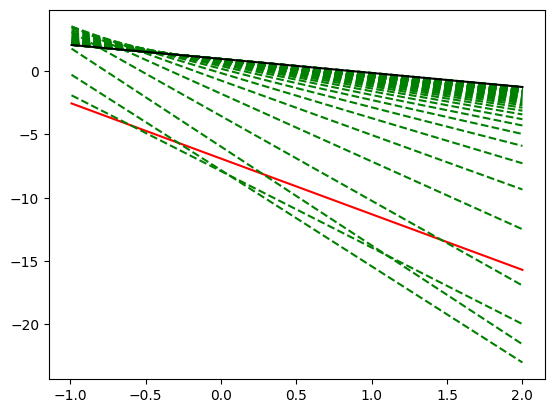

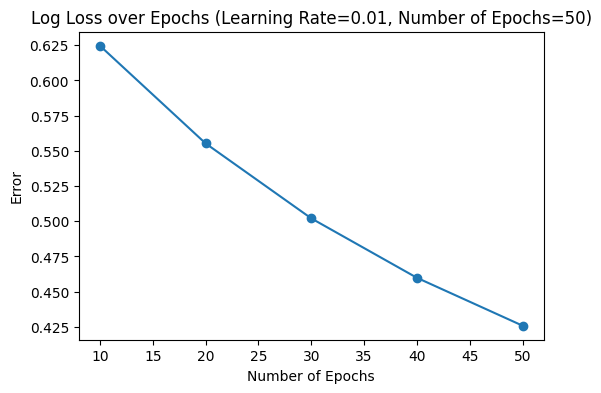

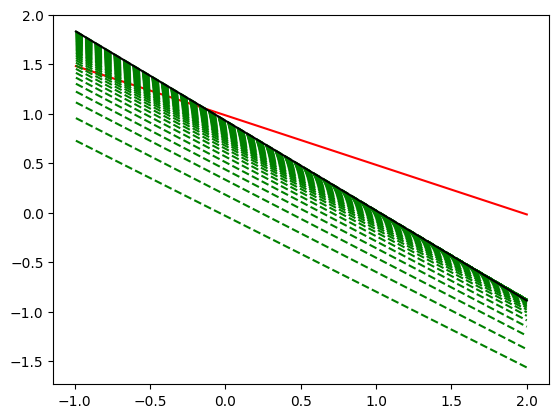

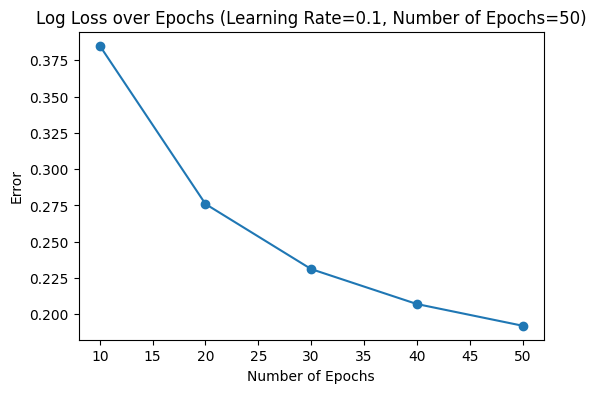

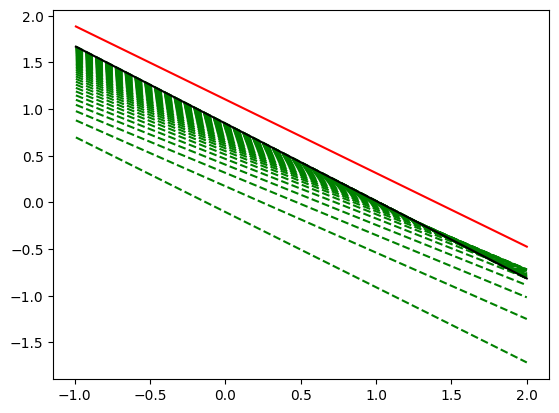

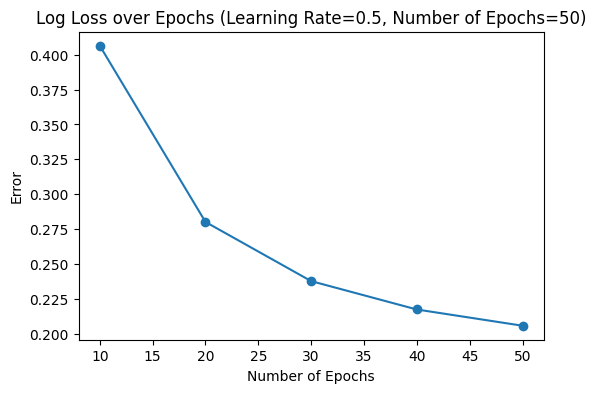

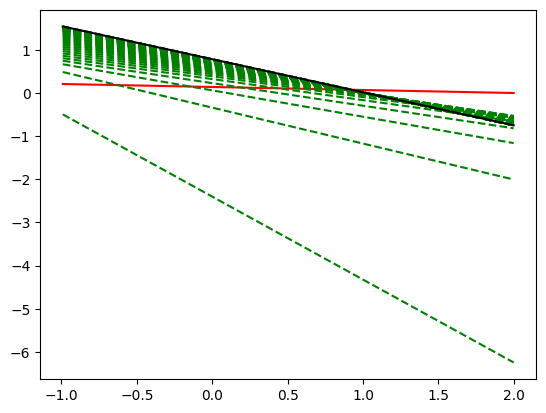

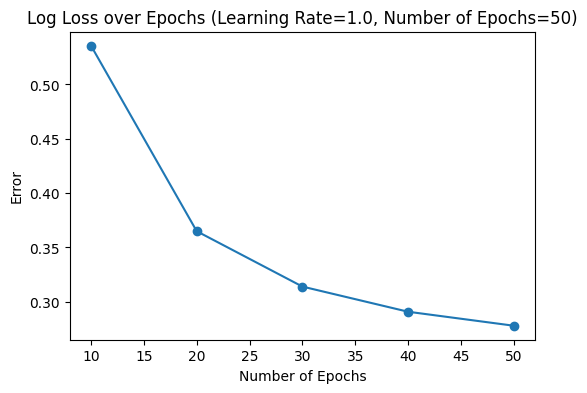

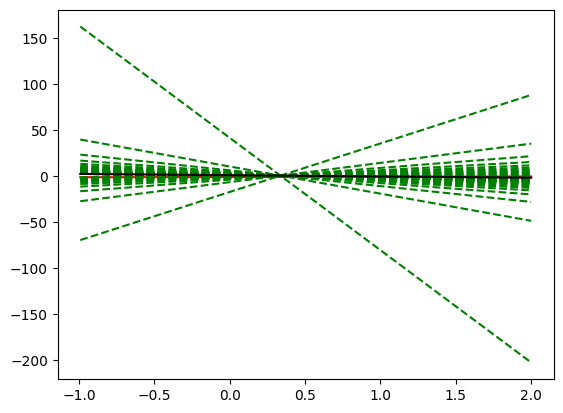

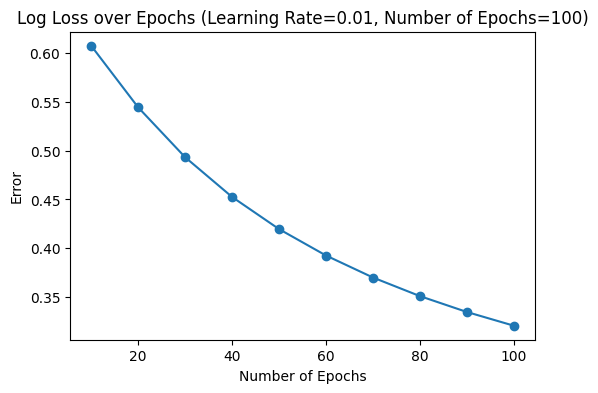

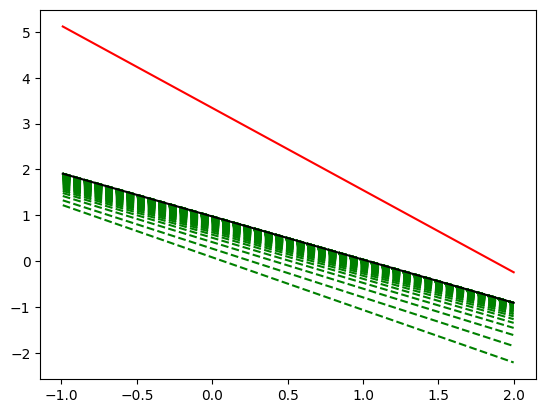

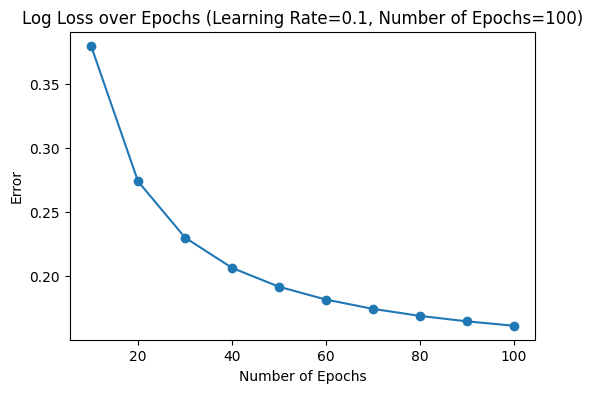

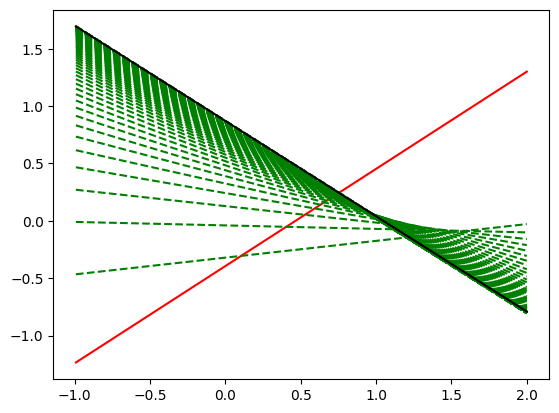

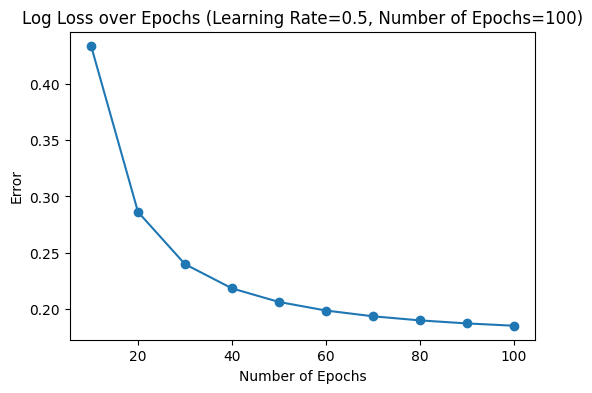

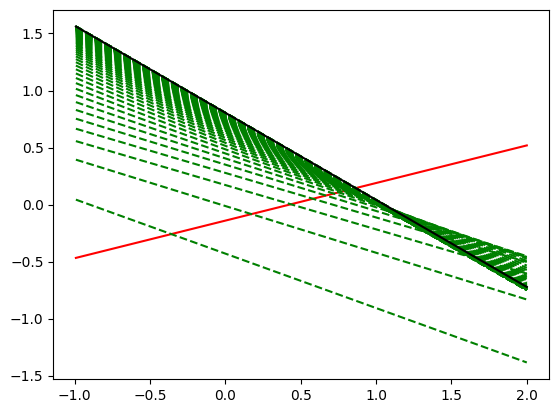

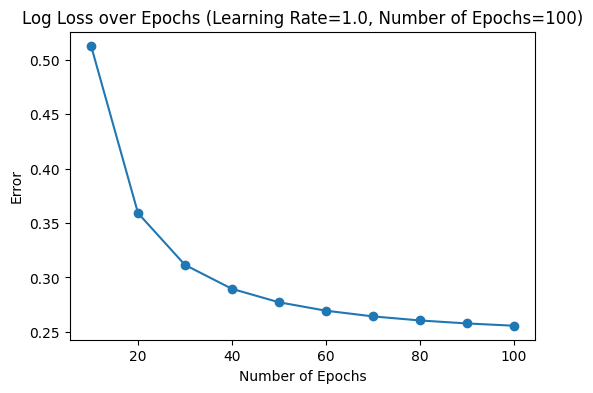

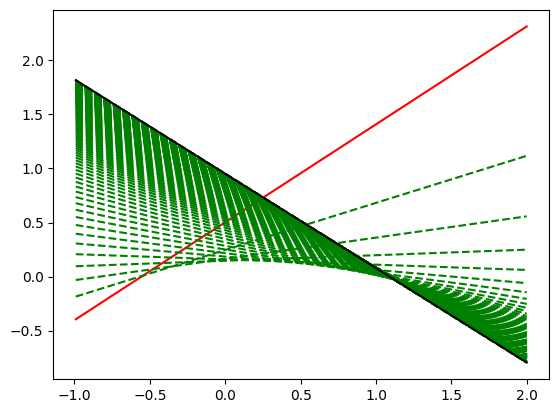

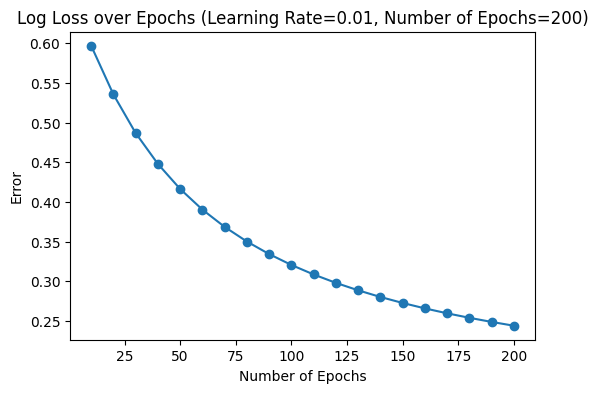

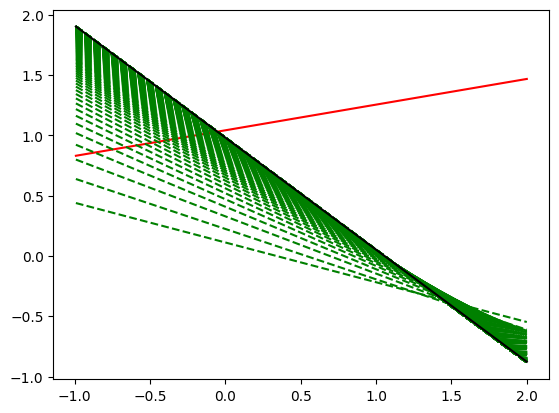

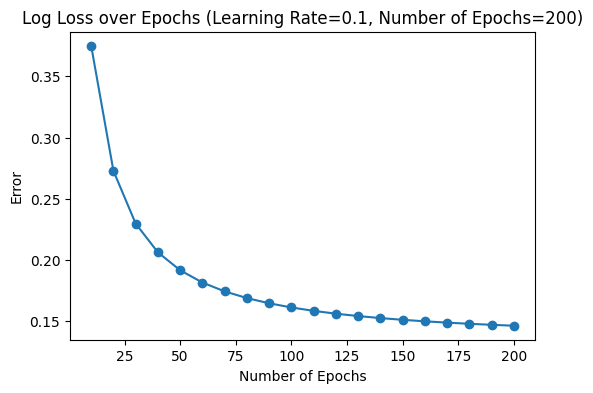

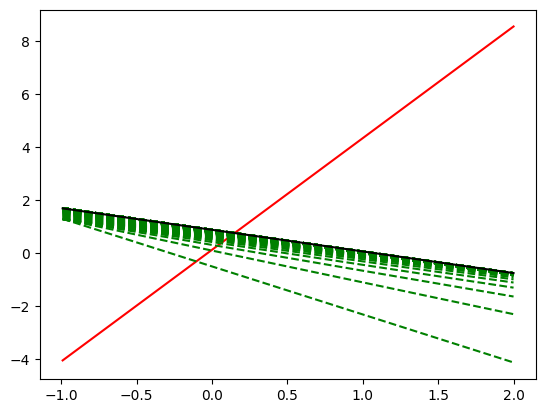

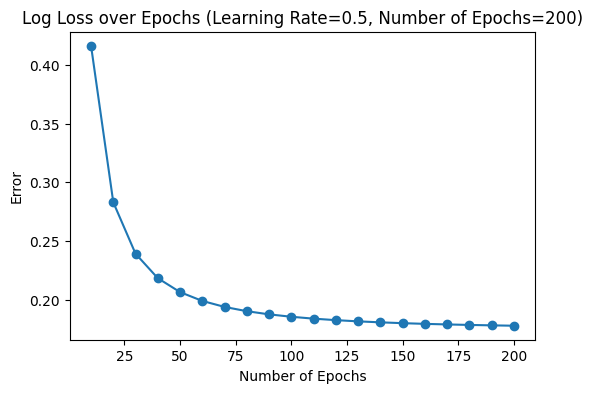

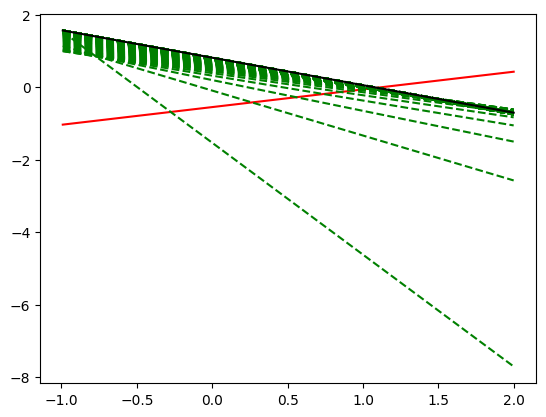

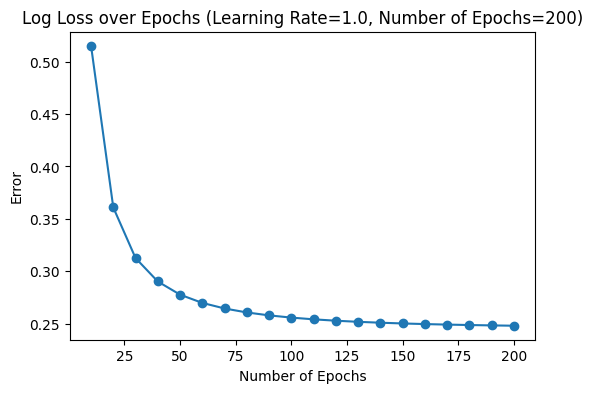

In [221]:
#define our sigmoid function
#used in our predition
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

#define our gradient decent function
def gradient_descent_perceptron(x, y, lr, epochs):
  #get how many columns
  n_features = x.shape[1]
  #Start a perceptron with random weights and bias
  weight = np.random.randn(n_features)
  bias = np.random.randn()

  #hold our log losses
  log_losses = []

  #Plot the initial boundary as a red line
  plot_line(weight, bias, "-", "red", label="Initial Boundary")

  #for all of our iterations
  for epoch in range(1, epochs + 1):
    for i in range(len(x)):
      #Compute prediction y_hat
      z = np.dot(x[i], weight) + bias
      y_hat = sigmoid(z)

      #Compute error y - y_hat
      error = y[i] - y_hat

      #Update the bias and weight
      #b + r(y - y_hat) -> b
      bias = bias + lr * error
      #For all w i : w i + r(y - y_hat)x i -> w
      weight = weight + lr * error * x[i]

    #Compute log loss every 10 epochs
    if epoch % 10 == 0:
      y_hat_all = sigmoid(np.dot(x, weight) + bias)
      #constant val to avoid log(0)
      val = 1e-8
      log_loss = -np.mean(y * np.log(y_hat_all + val) + (1 - y) * np.log(1 - y_hat_all + val))
      #update our log losses
      log_losses.append((epoch, log_loss))

    #Plot the boundary every epoch in green
    plot_line(weight, bias, "--", "green")

  #Plot the final boundary in black
  plot_line(weight, bias, "-", "black", label="Final Boundary")

  return weight, bias, log_losses


#plot out the whole figure to be shown in report
#learning rate and epochs varibles
learning_rates = [0.01, 0.1, 0.5, 1.0]
test_epochs = [10, 50, 100, 200]

plt.figure(figsize=(20, 15))
#run through all of our test epochs
for epochs_i, epochs in enumerate(test_epochs, start=1):
  #run through all of our learng rate values
  for learning_rate_i, lr in enumerate(learning_rates, start=1):
    #show all the graphs
    plt.subplot(len(test_epochs), len(learning_rates), (epochs_i-1)*len(learning_rates) + learning_rate_i)
    #plot the training data
    plt.scatter(x[:,0], x[:,1], c=y, cmap="bwr", edgecolors="k")
    #run the function
    weight_final, bias_final, log_losses = gradient_descent_perceptron(x, y, lr=lr, epochs=epochs)
    plt.title(f"Learning Rate={lr}, Number of Epochs={epochs}")
    plt.legend()
plt.show()

#Loop over all epochs and learning rates
#had to use AI to help with this one since it was funky,
#but its just a long list sorry for it looking bad
#graphs can be a pain
for epochs in test_epochs:
    for lr in learning_rates:
        # Run gradient descent perceptron
        _, _, log_losses = gradient_descent_perceptron(x, y, lr=lr, epochs=epochs)
        #Only plot if log_losses is not empty
        if log_losses:
            epochs_list, loss_list = zip(*log_losses)
            plt.figure(figsize=(6,4))
            plt.plot(epochs_list, loss_list, marker='o')
            plt.xlabel("Number of Epochs")
            plt.ylabel("Error")
            plt.title(f"Log Loss over Epochs (Learning Rate={lr}, Number of Epochs={epochs})")
            plt.show()

**Write Up**

Looking at the results we see a similar result to the heursitic apprach, but by in large we see a reduced sporadicness as our learning rate appraches a neutral value comared to how the herustic method behaves. However, where we truly see things shine is with the addtion of the log loss. If we examine our log loss graphs we see a stark decrase in the logs loss as we get higher higher and higher in our iterations/epochs. This is most notable in tesing with 200 epochs where the value reduces to almost 0 and we see that the graph also has very few outliers and the trend is very gradual. There is also the contrast to only 10 epochs where the values have much less control.

Across all values we see that the more epochs there are the lower the log loss value gets which increases accuracy. Comparing the two methods we see that with the Gradient Descent method the alogortim relies less on having a neutral/perfect learning rate and instead is able to narrow its accuracy through other methods(reducing the log loss over time).